In [25]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b512e7d4-669d-48b7-817a-511676dbf7fa',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2022-09-22T11:37:30.487Z', 'error_code': 0, 'error_message': None, 'elapsed': 34, 'credit_count': 1, 'notice': None, 'total_count': 9441}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9748, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [26]:
type(data)

dict

In [27]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)

In [43]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')
df

df

C:\Users\gianl\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9748,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19157568.00000,19157568.00000,NaN,1,NaN,NaN,None,2022-09-22T11:36:00.000Z,19080.18569,52297886146.15313,52.33300,-0.57566,-0.15639,-5.49324,-10.81075,-16.02315,-10.02369,365529954789.08716,39.49210,400683899468.39001,None,2022-09-22T11:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-22 11:59:52.651032
1,1027,Ethereum,ETH,ethereum,6099,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122475473.49900,122475473.49900,NaN,2,NaN,NaN,None,2022-09-22T11:36:00.000Z,1292.16491,22737653452.96308,63.38980,-0.36693,-3.91873,-18.82396,-19.56430,-20.18882,9.37108,158258509261.26895,17.09540,158258509261.26999,None,2022-09-22T11:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-22 11:59:52.651032
2,825,Tether,USDT,tether,39987,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,67969594332.23750,70156782825.87546,NaN,3,NaN,NaN,None,2022-09-22T11:36:00.000Z,1.00009,67725740125.14830,42.18650,0.00034,-0.00270,-0.00382,0.01275,0.01218,0.07273,67975569657.93292,7.34030,70162950431.13000,None,2022-09-22T11:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-22 11:59:52.651032
3,3408,USD Coin,USDC,usd-coin,6287,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,49936169105.40318,49936169105.40318,NaN,4,NaN,NaN,None,2022-09-22T11:36:00.000Z,1.00008,6553201513.98438,39.30070,-0.00862,-0.00469,-0.01048,0.00679,-0.00545,0.00990,49940251364.57738,5.39560,49940251364.58000,None,2022-09-22T11:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-22 11:59:52.651032
4,1839,BNB,BNB,bnb,1110,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-09-22T11:36:00.000Z,268.40714,1041257185.51978,34.42980,-0.09390,0.22092,-2.54491,-9.78097,1.47153,13.39551,43304072592.44236,4.67860,53681427712.21000,None,2022-09-22T11:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-22 11:59:52.651032
5,52,XRP,XRP,xrp,819,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,49848747475.00000,99989294935.00000,NaN,6,NaN,NaN,None,2022-09-22T11:36:00.000Z,0.42978,3654936421.58562,-10.57930,0.73435,7.20056,27.71771,26.54922,17.84239,15.14871,21423772432.38608,2.31460,42977554136.40000,None,2022-09-22T11:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-22 11:59:52.651032
6,4687,Binance USD,BUSD,binance-usd,5153,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,20517253084.58926,20517253084.58926,NaN,7,NaN,NaN,None,2022-09-22T11:36:00.000Z,0.99952,10236279368.67918,27.21580,-0.04108,0.00223,0.00376,-0.07466,-0.11494,-0.19247,20507374278.45182,2.21520,20507374278.45000,None,2022-09-22T11:36:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-09-22 11:59:52.651032
7,2010,Cardano,ADA,cardano,571,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34182044152.62900,34854947575.48000,NaN,8,NaN,NaN,None,2022-09-22T11:36:00.000Z,0.45424,1017128268.40972,26.62440,-0.40373,0.84788,-4.21132,-1.07644,-14.35473,-9.16505,15526789871.81699,1.67710,20440718557.14000,None,2022-09-22T11:36:00.000Z,NaN,NaN,NaN,NaN,NaN,

In [44]:
def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b512e7d4-669d-48b7-817a-511676dbf7fa',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)



    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    
# Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df
        
    #if not os.path.isfile(r'C:\Users\gianl\Downloads\API.csv'):
        #df.to_csv(r'C:\Users\gianl\Downloads\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\gianl\Downloads\API.csv'', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\gianl\Downloads\API.csv\API.csv')

In [45]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2022-09-22T11:59:58.337Z', 'error_code': 0, 'error_message': None, 'elapsed': 34, 'credit_count': 1, 'notice': None, 'total_count': 9441}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9748, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\gianl\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\gianl\AppData\Local\Temp\ipykernel_5660\2975222830.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


{'status': {'timestamp': '2022-09-22T12:00:58.663Z', 'error_code': 0, 'error_message': None, 'elapsed': 34, 'credit_count': 1, 'notice': None, 'total_count': 9441}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9748, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\gianl\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\gianl\AppData\Local\Temp\ipykernel_5660\2975222830.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


{'status': {'timestamp': '2022-09-22T12:01:59.016Z', 'error_code': 0, 'error_message': None, 'elapsed': 48, 'credit_count': 1, 'notice': None, 'total_count': 9441}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9748, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\gianl\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\gianl\AppData\Local\Temp\ipykernel_5660\2975222830.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


{'status': {'timestamp': '2022-09-22T12:02:59.417Z', 'error_code': 0, 'error_message': None, 'elapsed': 188, 'credit_count': 1, 'notice': None, 'total_count': 9441}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9748, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\gianl\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\gianl\AppData\Local\Temp\ipykernel_5660\2975222830.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


{'status': {'timestamp': '2022-09-22T12:03:59.827Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 9441}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9748, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\gianl\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\gianl\AppData\Local\Temp\ipykernel_5660\2975222830.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


KeyboardInterrupt: 

In [31]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9748,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19157568.00000,19157568.00000,NaN,1,NaN,NaN,None,2022-09-22T11:36:00.000Z,19080.18569,52297886146.15313,52.33300,-0.57566,-0.15639,-5.49324,-10.81075,-16.02315,-10.02369,365529954789.08716,39.49210,400683899468.39001,None,2022-09-22T11:36:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT
1,1027,Ethereum,ETH,ethereum,6099,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122475473.49900,122475473.49900,NaN,2,NaN,NaN,None,2022-09-22T11:36:00.000Z,1292.16491,22737653452.96308,63.38980,-0.36693,-3.91873,-18.82396,-19.56430,-20.18882,9.37108,158258509261.26895,17.09540,158258509261.26999,None,2022-09-22T11:36:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT
2,825,Tether,USDT,tether,39987,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,67969594332.23750,70156782825.87546,NaN,3,NaN,NaN,None,2022-09-22T11:36:00.000Z,1.00009,67725740125.14830,42.18650,0.00034,-0.00270,-0.00382,0.01275,0.01218,0.07273,67975569657.93292,7.34030,70162950431.13000,None,2022-09-22T11:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,NaT
3,3408,USD Coin,USDC,usd-coin,6287,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,49936169105.40318,49936169105.40318,NaN,4,NaN,NaN,None,2022-09-22T11:36:00.000Z,1.00008,6553201513.98438,39.30070,-0.00862,-0.00469,-0.01048,0.00679,-0.00545,0.00990,49940251364.57738,5.39560,49940251364.58000,None,2022-09-22T11:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,NaT
4,1839,BNB,BNB,bnb,1110,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-09-22T11:36:00.000Z,268.40714,1041257185.51978,34.42980,-0.09390,0.22092,-2.54491,-9.78097,1.47153,13.39551,43304072592.44236,4.67860,53681427712.21000,None,2022-09-22T11:36:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,6636,Polkadot,DOT,polkadot-new,414,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1119141392.63623,1234565062.96141,NaN,11,904869778.00000,5832675843.27868,None,2022-09-22T11:51:00.000Z,6.44587,419421442.02917,58.40890,0.12676,1.55845,-9.19988,-15.45327,-13.70926,-20.53869,7213843499.63625,0.77760,7957849841.78000,None,2022-09-22T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-22 11:53:04.321623
11,4943,Dai,DAI,multi-collateral-dai,1366,2019-11-22T00:00:00.000Z,"[defi, stablecoin, asset-backed-stablecoin, et...",NaN,6877042021.32835,6877042021.32835,NaN,12,NaN,NaN,None,2022-09-22T11:51:00.000Z,1.00034,520180353.86048,57.61680,0.05366,-0.01537,0.04989,-0.00292,-0.00291,-0.00186,6879373666.09192,0.74080,6879373666.09000,None,2022-09-22T11:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2022-09-22 11:53:04.321623
12,3890,Polygon,MATIC,polygon,490,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, scaling, stat...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,13,NaN,NaN,None,2022-09-22T11:51:00.000Z,0.75069,523681502.24605,58.02320,0.01190,2.41373,-12.52733,-7.64256,-14.14512,25.

In [ ]:
df72 = pd.read_csv(r'C:\Users\gianl\Downloads\API.csv\API.csv')
df72

In [32]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [46]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.32912,0.26477,-4.78246,-10.46514,-15.34179,-9.27756
Ethereum,0.77670,-3.29833,-17.99232,-19.29151,-19.27004,9.71712
Tether,-0.00295,-0.00652,-0.00309,0.00625,0.00591,0.06779
USD Coin,0.00317,0.00301,0.00200,0.00251,0.00192,0.00781
BNB,0.56404,0.20053,-2.17646,-9.64827,2.13449,13.80987
XRP,1.47750,6.69897,28.71156,26.84358,18.78069,16.07130
Binance USD,0.01471,0.02271,0.04454,0.00354,0.02714,-0.00803
Cardano,0.26199,0.90002,-3.89454,-0.99676,-13.57701,-8.53534
Solana,0.27586,0.99704,-4.67023,-9.17317,-21.11636,-19.60044


In [47]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h      0.32912
         quote.USD.percent_change_24h     0.26477
         quote.USD.percent_change_7d     -4.78246
         quote.USD.percent_change_30d   -10.46514
         quote.USD.percent_change_60d   -15.34179
                                           ...   
TRON     quote.USD.percent_change_24h     0.19540
         quote.USD.percent_change_7d     -2.89858
         quote.USD.percent_change_30d    -9.15954
         quote.USD.percent_change_60d   -11.32015
         quote.USD.percent_change_90d    -8.44856
Length: 90, dtype: float64

In [14]:
type(df4)


pandas.core.series.Series

In [48]:
df5 = df4.to_frame(name='values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h    0.32912
        quote.USD.percent_change_24h   0.26477
        quote.USD.percent_change_7d   -4.78246
        quote.USD.percent_change_30d -10.46514
        quote.USD.percent_change_60d -15.34179
...                                        ...
TRON    quote.USD.percent_change_24h   0.19540
        quote.USD.percent_change_7d   -2.89858
        quote.USD.percent_change_30d  -9.15954
        quote.USD.percent_change_60d -11.32015
        quote.USD.percent_change_90d  -8.44856

[90 rows x 1 columns]

In [49]:
df5.count()


values    90
dtype: int64

In [50]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.32912
1,Bitcoin,quote.USD.percent_change_24h,0.26477
2,Bitcoin,quote.USD.percent_change_7d,-4.78246
3,Bitcoin,quote.USD.percent_change_30d,-10.46514
4,Bitcoin,quote.USD.percent_change_60d,-15.34179
...,...,...,...
85,TRON,quote.USD.percent_change_24h,0.19540
86,TRON,quote.USD.percent_change_7d,-2.89858
87,TRON,quote.USD.percent_change_30d,-9.15954
88,TRON,quote.USD.percent_change_60d,-11.32015


In [51]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.32912
1,Bitcoin,quote.USD.percent_change_24h,0.26477
2,Bitcoin,quote.USD.percent_change_7d,-4.78246
3,Bitcoin,quote.USD.percent_change_30d,-10.46514
4,Bitcoin,quote.USD.percent_change_60d,-15.34179
...,...,...,...
85,TRON,quote.USD.percent_change_24h,0.19540
86,TRON,quote.USD.percent_change_7d,-2.89858
87,TRON,quote.USD.percent_change_30d,-9.15954
88,TRON,quote.USD.percent_change_60d,-11.32015


In [52]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.32912
1,Bitcoin,24h,0.26477
2,Bitcoin,7d,-4.78246
3,Bitcoin,30d,-10.46514
4,Bitcoin,60d,-15.34179
...,...,...,...
85,TRON,24h,0.19540
86,TRON,7d,-2.89858
87,TRON,30d,-9.15954
88,TRON,60d,-11.32015


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

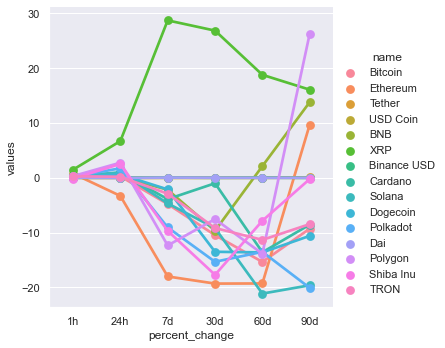

In [54]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


In [55]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,19080.18569,2022-09-22 11:59:52.651032
0,Bitcoin,19232.68895,2022-09-22 11:59:58.817879
0,Bitcoin,19233.49484,2022-09-22 12:00:59.151726
0,Bitcoin,19232.74493,2022-09-22 12:01:59.502446
0,Bitcoin,19232.74493,2022-09-22 12:02:59.995437
0,Bitcoin,19232.33670,2022-09-22 12:04:00.316145
